# *REGRESION LINEAL MULTIPLE POR MINIMOS CUADRADOS*

## A) DEMOSTRACIÓN GEOMÉTRICA.

![Demo_1](https://user-images.githubusercontent.com/47722525/78722987-3252e900-78f0-11ea-8ceb-48afe615b628.png)

![Demo_2](https://user-images.githubusercontent.com/47722525/78723052-557d9880-78f0-11ea-8fd7-c9642fd8bffb.png)

![Demo_3](https://user-images.githubusercontent.com/47722525/78723056-57475c00-78f0-11ea-88ca-36c159df6160.png)

## B) FÓRMULA MATEMÁTICA.

![MatForm](https://user-images.githubusercontent.com/47722525/78723140-8362dd00-78f0-11ea-9c6c-8ff0638841b2.png)

## C) PROGRAMACIÓN PARA LA REGRESION LINEAL POR MINIMOS CUADRADOS EN HIDROLOGÍA.

In [3]:
import math
import numpy as np

def RegLin_MinimosCuadrados(V_duracion, M_intencidades):
    
    Sum_N = 0
    Sum_X1 = 0
    Sum_X2 = 0
    Sum_Y = 0
    Sum_X1Y = 0
    Sum_X2Y = 0
    Sum_X1X2 = 0
    Sum_X12 = 0
    Sum_X22 = 0
    
    for j in range(len(V_duracion)):
        
        # Vector de intencidades a evaluar:
        M_intencidades[j].sort(reverse=True)

        # Número de datos en el vector de intencidades:
        N = len(M_intencidades[j])

        # Vector de número de muestras:
        Vector_muestras = [i+1 for i in range(N)]

        # Vector de periodos de retorno:
        Vector_Tr = [(Vector_muestras[-1]+1)/Vector_muestras[i] for i in range(N)]

        # Vector de duración:
        Vector_d = [V_duracion[j]]*N

        # Vectores del Metodo de RLMC:
        Vec_x1 = [math.log10(Vector_Tr[i]) for i in range(N)]
        Vec_x2 = [math.log10(Vector_d[i]) for  i in range(N)]
        Vec_y = [math.log10(M_intencidades[j][i]) for i in range(N)]
        Vec_x1y = [Vec_x1[i]*Vec_y[i] for i in range(N)]
        Vec_x2y = [Vec_x2[i]*Vec_y[i] for i in range(N)]
        Vec_x1x2 = [Vec_x1[i]*Vec_x2[i] for i in range(N)]
        Vec_x12 = [Vec_x1[i]**2 for i in range(N)]
        Vec_x22 = [Vec_x2[i]**2 for i in range(N)]

        Sum_N += N
        Sum_X1 += sum(Vec_x1)
        Sum_X2 += sum(Vec_x2)
        Sum_Y += sum(Vec_y)
        Sum_X1Y += sum(Vec_x1y)
        Sum_X2Y += sum(Vec_x2y)
        Sum_X1X2 += sum(Vec_x1x2)
        Sum_X12 += sum(Vec_x12)
        Sum_X22 += sum(Vec_x22)
        
    A = np.array([[Sum_N,Sum_X1,Sum_X2],[Sum_X1,Sum_X12,Sum_X1X2],[Sum_X2,Sum_X1X2,Sum_X22]])
    B = np.array([[Sum_Y],[Sum_X1Y],[Sum_X2Y]])
    [a0,a1,a2] = np.linalg.solve(A, B) 
        
    return float(a0),float(a1),float(a2)

def Intencidad(a0,a1,a2,Tr,d):
    k = 10**a0
    m = a1
    n = -a2
    return (k*Tr**m)/(d**n)

## D) APLICACIÓN DE LA REGRESION LINEAL MULTIPLE POR MINIMOS CUADRADOS.

### <font color='blue'>EJEMPLO 1.- INTENSIDAD DE LLUVIA.</font>

### _Obtener la curva de Intensidad-Duracion-Periodo de Retorno para los siguientes datos registrados atraves de un pluviometro:_

|   Año  | 5 min  | 10 min | 20 min | 45 min | 80 min | 120 min |
|:------:|:------:|:------:|:------:|:------:|:------:|:-------:|
|  1954  |   96   |   54   |   28   |   14   |   10   |     7   |
|  1955  |   96   |   48   |   44   |   27   |   26   |    24   |
|  1956  |   150  |   93   |   60   |   33   |   19   |    13   |
|  1957  |   90   |   66   |   43   |   25   |   19   |    15   |
|  1959  |   68   |   41   |   28   |   13   |   11   |     8   |
|  1960  |   118  |   70   |   54   |   27   |   16   |    11   |
|  1961  |   85   |   43   |   21   |   9    |    5   |     4   |
|  1962  |   162  |   111  |   62   |   51   |   45   |    40   |
|  1963  |   92   |   60   |   35   |   27   |   17   |    15   |
|  1964  |   120  |   105  |   53   |   25   |   14   |    10   |

### _Todas las intensidades estan en mm/hr, se considera un periodo de retorno de 5 años y la gráfica para cada duración se trazará utilizando la siguiente formula:_

![inten](https://user-images.githubusercontent.com/47722525/78723409-f9ffda80-78f0-11ea-9c1a-079719bbd037.png)

### SOLUCIÓN.

### <font color='green'>a) Datos:</font>

In [27]:
''' Periodo de Retorno '''
Tr = 5 # Años

''' Datos de duracion '''
d5= [96,96,150,90,68,118,85,162,92,120] # mm/hr
d10 = [54,48,93,66,41,70,43,111,60,105] # mm/hr
d20 = [28,44,60,43,28,54,21,62,35,53] # mm/hr
d45 = [14,27,33,25,13,27,9,51,27,25] # mm/hr
d80 = [10,26,19,19,11,16,5,45,17,14] # mm/hr
d120 = [7,24,13,15,8,11,4,40,15,10] # mm/hr

### <font color='green'>b) Acomodo de datos:</font>

In [28]:
M_int = [d5,d10,d20,d45,d80,d120]
V_dur = [5,10,20,45,80,120]

### <font color='green'>c) Regresión Lineal Multiple:</font>

In [29]:
a,b,c = RegLin_MinimosCuadrados(V_dur, M_int)

### <font color='green'>d) Cálculo de la Intencidad para diferentes duraciones:</font>

#### Intencidad de lluvia para Tr = 5 años y d = 5 min.

In [30]:
Tr = 5 #años
d = 5 #min
I5 = Intencidad(a,b,c,Tr,d)
print('Intencidad = ',round(I5,2),'mm/hr')

Intencidad =  157.21 mm/hr


#### Intencidad de lluvia para Tr = 5 años y d = 10 min.

In [15]:
Tr = 5 #años
d = 10 #min
I10 = Intencidad(a,b,c,Tr,d)
print('Intencidad = ',round(I10,2),'mm/hr')

Intencidad =  98.0 mm/hr


#### Intencidad de lluvia para Tr = 5 años y d = 20 min.

In [31]:
Tr = 5 #años
d = 20 #min
I20 = Intencidad(a,b,c,Tr,d)
print('Intencidad = ',round(I20,2),'mm/hr')

Intencidad =  61.09 mm/hr


#### Intencidad de lluvia para Tr = 5 años y d = 45 min.

In [32]:
Tr = 5 #años
d = 45 #min
I45 = Intencidad(a,b,c,Tr,d)
print('Intencidad = ',round(I45,2),'mm/hr')

Intencidad =  35.14 mm/hr


#### Intencidad de lluvia para Tr = 5 años y d = 60 min.

In [33]:
Tr = 5 #años
d = 60 #min
I80 = Intencidad(a,b,c,Tr,d)
print('Intencidad = ',round(I80,2),'mm/hr')

Intencidad =  28.88 mm/hr


#### Intencidad de lluvia para Tr = 5 años y d = 120 min.

In [34]:
Tr = 5 #años
d = 120 #min
I120 = Intencidad(a,b,c,Tr,d)
print('Intencidad = ',round(I120,2),'mm/hr')

Intencidad =  18.01 mm/hr


### <font color='green'>e) Gráfica de resultados:</font>

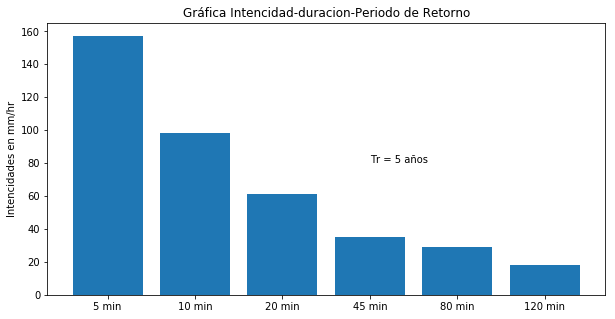

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure(u'Gráfica de barras',figsize=(10,5)) # Figure
ax = fig.add_subplot(111) # Axes

nombres = ['5 min','10 min','20 min','45 min','80 min','120 min']
datos = [I5,I10,I20,I45,I80,I120]
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(nombres)
plt.title('Gráfica Intencidad-duracion-Periodo de Retorno')
plt.ylabel('Intencidades en mm/hr')
plt.text(3, 80, 'Tr = 5 años')
plt.show()